In [101]:
import io
import json
import boto3
import base64
from bs4 import BeautifulSoup
from IPython.display import HTML, display, Image

In [107]:
def get_proxy():
    num_proxies = 10
    lambda_client = boto3.client('lambda')
    round_robin = 0
    while True:
        url = yield
        response = json.loads(
            lambda_client.invoke(FunctionName=f'proxy-{round_robin}',
                                 InvocationType='RequestResponse',
                                 Payload=json.dumps({"url":
                                                     url}))['Payload'].read())
        yield response
        round_robin = (round_robin + 1) % num_proxies

In [109]:
proxy = get_proxy()

In [219]:
search_text = 'john coltrane'
search_text = '+'.join(search_text.lower().split(' '))

In [220]:
url = f'https://www.popsike.com/php/quicksearch.php?searchtext={search_text}&pagenum=1&sprice=&eprice=&bidsfrom=&bidsthru=&endfrom=&endthru=&currsel=1'
proxy.send(None)
response = proxy.send(url)
soup = BeautifulSoup(base64.b64decode(response['body']).decode('utf-8'), 'html.parser')
links = soup.find_all('a', href=True)
items = []
for link in links:
    if link.find('img') and link.find('img')['src'][:4] == '/thu':
        items.append((link['href'][2:], link.find('img')['src']))


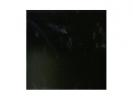
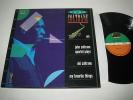
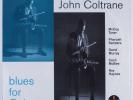
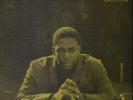
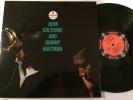
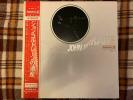
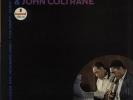
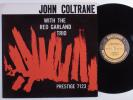
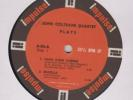
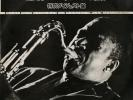
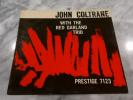
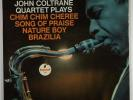
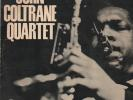
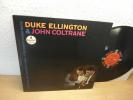
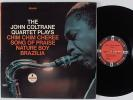
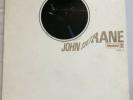
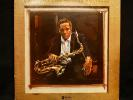
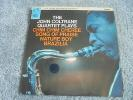
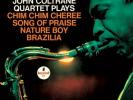
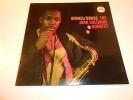
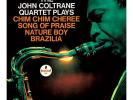
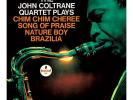
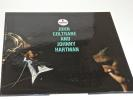
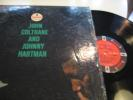
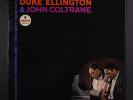

In [221]:
row_height = 'auto'

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'
            
figures = []
for _, item in enumerate(items):
    proxy.send(None)
    response = proxy.send('https://popsike.com' + item[1])
    image = base64.b64decode(response['body'])
    if isinstance(image, bytes):
        src = _src_from_data(image)
        caption = _
    else:
        src = image
        caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
    figures.append(f'''
        <figure style="margin: 5px !important;">
          <img src="{src}" style="height: {row_height}">
          {caption}
        </figure>
    ''')
HTML(data=f'''
    <div style="display: flex; flex-flow: row wrap; text-align: center;">
    {''.join(figures)}
    </div>
''')

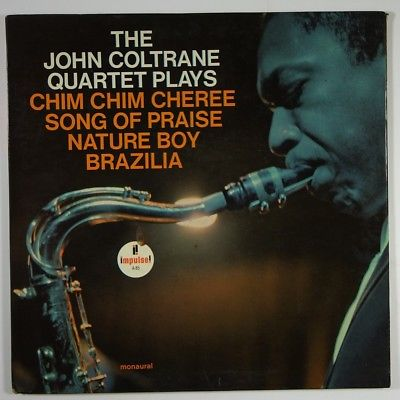

In [223]:
item_number = 11
proxy.send(None)
response = proxy.send('https://popsike.com' + items[item_number][0])
soup = BeautifulSoup(base64.b64decode(response['body']).decode('utf-8'), 'html.parser')
soup.find_all('img')[0]['src']
proxy.send(None)
response = proxy.send(soup.find_all('img')[0]['src'])
img = Image(base64.b64decode(response['body']))
display(img)

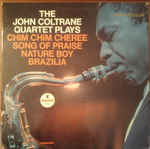

In [224]:
release = '197994'
display(Image(open(f'thumbs/thumb_{release}.jpg', 'rb').read()))

In [225]:
with open(f'popsike/{release}.jpg', 'wb') as file:
    file.write(base64.b64decode(response['body']))